In [2]:
import pandas as pd
train_df = pd.read_csv('data/train.csv')
train_df.shape
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
train_df.isnull().sum()


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

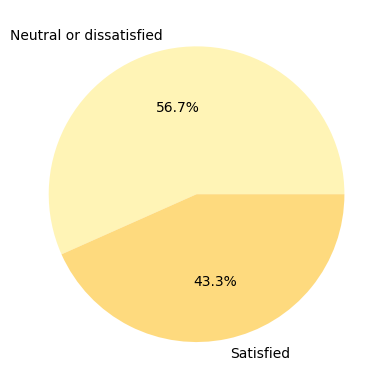

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.pie(train_df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# 1. Drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'id', 'Departure Delay in Minutes', 'Gender']
train_df = train_df.drop(columns=[c for c in cols_to_drop if c in train_df.columns])
test_df = test_df.drop(columns=[c for c in cols_to_drop if c in test_df.columns])

# 2. Fill Missing Values (Imputing Test data using Train median)
train_median = train_df['Arrival Delay in Minutes'].median()
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(train_median)
test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].fillna(train_median)

# 3. Encoding

# Satisfaction
satisfaction_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
train_df['satisfaction'] = train_df['satisfaction'].map(satisfaction_map)
test_df['satisfaction'] = test_df['satisfaction'].map(satisfaction_map)

# Class
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
train_df['Class'] = train_df['Class'].map(class_mapping)
test_df['Class'] = test_df['Class'].map(class_mapping)

# Other Categorical Variables
categorical_cols = ['Customer Type', 'Type of Travel']
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on Train, transform on both Train and Test
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    print(le.classes_)


X_train = train_df.drop('satisfaction', axis=1)
y_train = train_df['satisfaction']

X_test = test_df.drop('satisfaction', axis=1)
y_test = test_df['satisfaction']


# Check / Verification
print("Train Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)
print("\nTest Set (First 5 Rows):")
print(test_df.head())
print("\nTest Set Missing Value Check:")
print(test_df.isnull().sum())

['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
Train Set Shape: (103904, 21)
Test Set Shape: (25976, 21)

Test Set (First 5 Rows):
   Customer Type  Age  Type of Travel  Class  Flight Distance  \
0              0   52               0      0              160   
1              0   36               0      2             2863   
2              1   20               0      0              192   
3              0   44               0      2             3377   
4              0   49               0      0             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  Food and drink  ...  Seat c

In [13]:
le = LabelEncoder()
le.fit(train_df['Customer Type'])
print(le.classes_)

[0 1]


In [14]:
corr_mat = train_df.corr()
corr_mat

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
Customer Type,1.000000,-0.281674,-0.308333,-0.105735,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,...,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004815,-0.187638
Age,-0.281674,1.000000,-0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,...,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.012105,0.137167
Type of Travel,-0.308333,-0.048524,1.000000,-0.545257,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,...,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005867,-0.449000
Class,-0.105735,0.140565,-0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,0.004150,0.085908,...,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.013538,0.494471
Flight Distance,-0.225200,0.099461,-0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,...,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,-0.002470,0.298780
Inflight wifi service,-0.007543,0.017859,-0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,...,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.019042,0.284245
Departure/Arrival time convenient,-0.206869,0.038125,0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,...,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.000918,-0.051601
Ease of Online booking,-0.019509,0.024842,-0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,...,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.007947,0.171705
Gate location,0.006078,-0.001330,-0.030700,0.004150,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,...,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005178,0.000682
Food and drink,-0.059454,0.023000,-0.063439,0.085908,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,...,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.032466,0.209936


In [15]:
import numpy as np

# Select the upper triangle of the matrix (To avoid duplicates)
# Setting k=1 allows us to eliminate the diagonal 1.0 values from the start
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

# Unstack, drop missing values, and sort
top_correlations = upper_tri.unstack().dropna().sort_values(ascending=False)

# Print the top 10
print(top_correlations.head(10))

Ease of Online booking  Inflight wifi service     0.715856
Cleanliness             Inflight entertainment    0.691815
                        Seat comfort              0.678534
                        Food and drink            0.657760
Inflight service        Baggage handling          0.628561
Inflight entertainment  Food and drink            0.622512
                        Seat comfort              0.610590
Seat comfort            Food and drink            0.574556
Inflight service        On-board service          0.550782
Baggage handling        On-board service          0.519134
dtype: float64


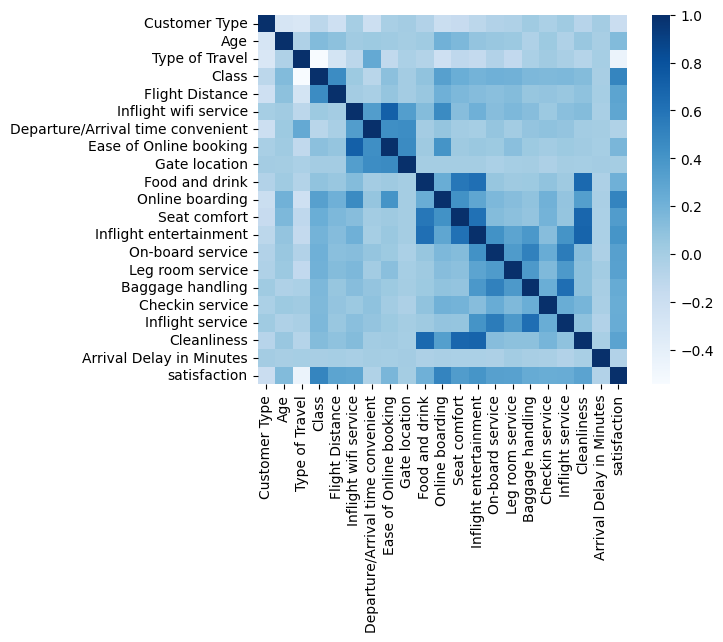

In [16]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

In [17]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

print("🌲 Optimizing RANDOM FOREST...")


# DATA SPLIT FOR OPTUNA (Validation Split)

# We split the training set so Optuna doesn't see the test set while tuning parameters.
# 80% Training, 20% Validation
X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, 
    train_size=0.8, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)


# OBJECTIVE FUNCTION

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestClassifier(**params)
    model.fit(X_opt_train, y_opt_train)
    preds = model.predict(X_opt_val)
    return accuracy_score(y_opt_val, preds)


# START TUNING

optuna.logging.set_verbosity(optuna.logging.WARNING)
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10) # 10 trials (for speed)

best_params_rf = study_rf.best_params
print(f"⚙️  Best Parameters: {best_params_rf}")


# FINAL MODEL & DUAL REPORTING

# Train the final model with best parameters on ALL training data (X_train)
final_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
final_rf.fit(X_train, y_train)

# DUAL Classification Report Function 
def detailed_classification_report(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print("\n" + "="*60)
    print("📊 TUNED RANDOM FOREST RESULTS")
    print("="*60)
    
    # 1. TRAIN REPORT (Did the model overfit?)
    print("TRAINING SET REPORT")
    print(classification_report(y_train, train_pred, digits=4))
    
    # 2. TEST REPORT (How does it perform in real life?)
    print("TEST SET REPORT")
    print(classification_report(y_test, test_pred, digits=4))
    
    # Overfitting Check
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    diff = train_acc - test_acc
    
    print("-" * 60)
    print(f"Accuracy Difference (Train - Test): {diff:.4f}")

# Run the function
detailed_classification_report(final_rf, X_train, y_train, X_test, y_test)

🌲 Optimizing RANDOM FOREST...
⚙️  Best Parameters: {'n_estimators': 287, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1}

📊 TUNED RANDOM FOREST RESULTS
TRAINING SET REPORT
              precision    recall  f1-score   support

           0     0.9764    0.9946    0.9854     58879
           1     0.9927    0.9685    0.9805     45025

    accuracy                         0.9833    103904
   macro avg     0.9845    0.9815    0.9829    103904
weighted avg     0.9835    0.9833    0.9833    103904

TEST SET REPORT
              precision    recall  f1-score   support

           0     0.9562    0.9791    0.9675     14573
           1     0.9724    0.9426    0.9573     11403

    accuracy                         0.9631     25976
   macro avg     0.9643    0.9609    0.9624     25976
weighted avg     0.9633    0.9631    0.9630     25976

------------------------------------------------------------
Accuracy Difference (Train - Test): 0.0202


Optimizing XGBOOST (Optuna)...
⚙️  XGBoost Best Parameters: {'n_estimators': 259, 'max_depth': 9, 'learning_rate': 0.04790944289181043, 'subsample': 0.9624110572177574, 'colsample_bytree': 0.8032000324459655, 'min_child_weight': 3}
🏆 Final Model Training with ALL Data & Recording History...


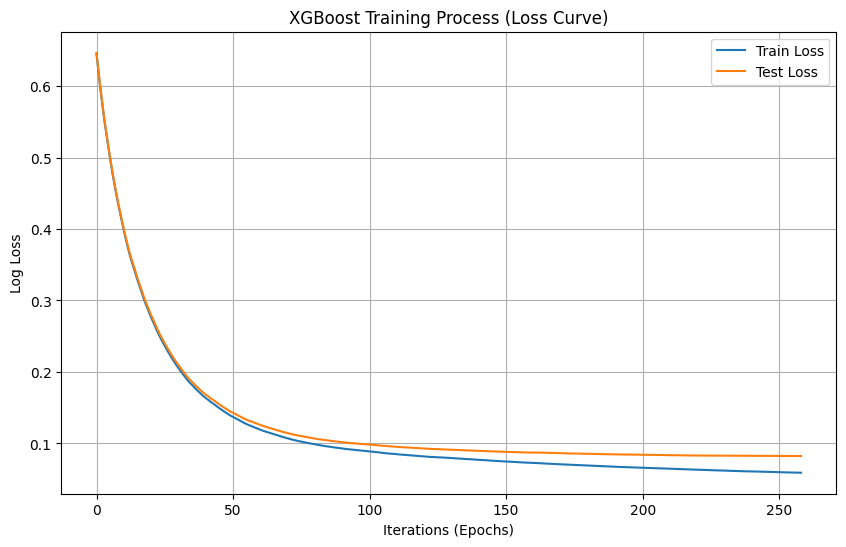


TUNED XGBOOST RESULTS
 TRAINING SET REPORT
              precision    recall  f1-score   support

           0     0.9701    0.9899    0.9799     58879
           1     0.9864    0.9602    0.9731     45025

    accuracy                         0.9770    103904
   macro avg     0.9783    0.9750    0.9765    103904
weighted avg     0.9772    0.9770    0.9770    103904

 TEST SET REPORT
              precision    recall  f1-score   support

           0     0.9575    0.9796    0.9685     14573
           1     0.9732    0.9445    0.9586     11403

    accuracy                         0.9642     25976
   macro avg     0.9654    0.9621    0.9635     25976
weighted avg     0.9644    0.9642    0.9641     25976

------------------------------------------------------------
Train Accuracy: 0.9770 | Test Accuracy: 0.9642


In [18]:
import optuna
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

print("Optimizing XGBOOST (Optuna)...")


# DATA SPLIT FOR OPTUNA
X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, 
    train_size=0.8, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)


# OBJECTIVE FUNCTION

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'n_jobs': -1
    }
    
    model = XGBClassifier(**params)
    model.fit(X_opt_train, y_opt_train)
    preds = model.predict(X_opt_val)
    return accuracy_score(y_opt_val, preds)


# START TUNING

optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30) 

best_params_xgb = study_xgb.best_params
print(f"⚙️  XGBoost Best Parameters: {best_params_xgb}")


# FINAL MODEL, PLOTTING & REPORTING

print("🏆 Final Model Training with ALL Data & Recording History...")

# Create model with best parameters
final_xgb = XGBClassifier(
    **best_params_xgb, 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    n_jobs=-1
)

final_xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=False 
)

# TRAINING PLOT (LEARNING CURVE)
results = final_xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test Loss')
plt.legend()
plt.ylabel('Log Loss')
plt.xlabel('Iterations (Epochs)')
plt.title('XGBoost Training Process (Loss Curve)')
plt.grid(True)
plt.show()

# REPORTING FUNCTION
def detailed_classification_report_xgb(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print("\n" + "="*60)
    print("TUNED XGBOOST RESULTS")
    print("="*60)
    
    print(" TRAINING SET REPORT")
    print(classification_report(y_train, train_pred, digits=4))
    
    print(" TEST SET REPORT")
    print(classification_report(y_test, test_pred, digits=4))
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    print("-" * 60)
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
# Run the function
detailed_classification_report_xgb(final_xgb, X_train, y_train, X_test, y_test)

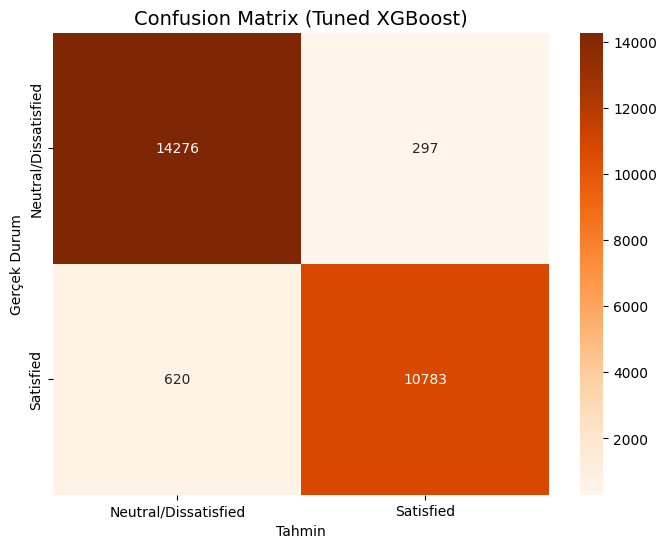

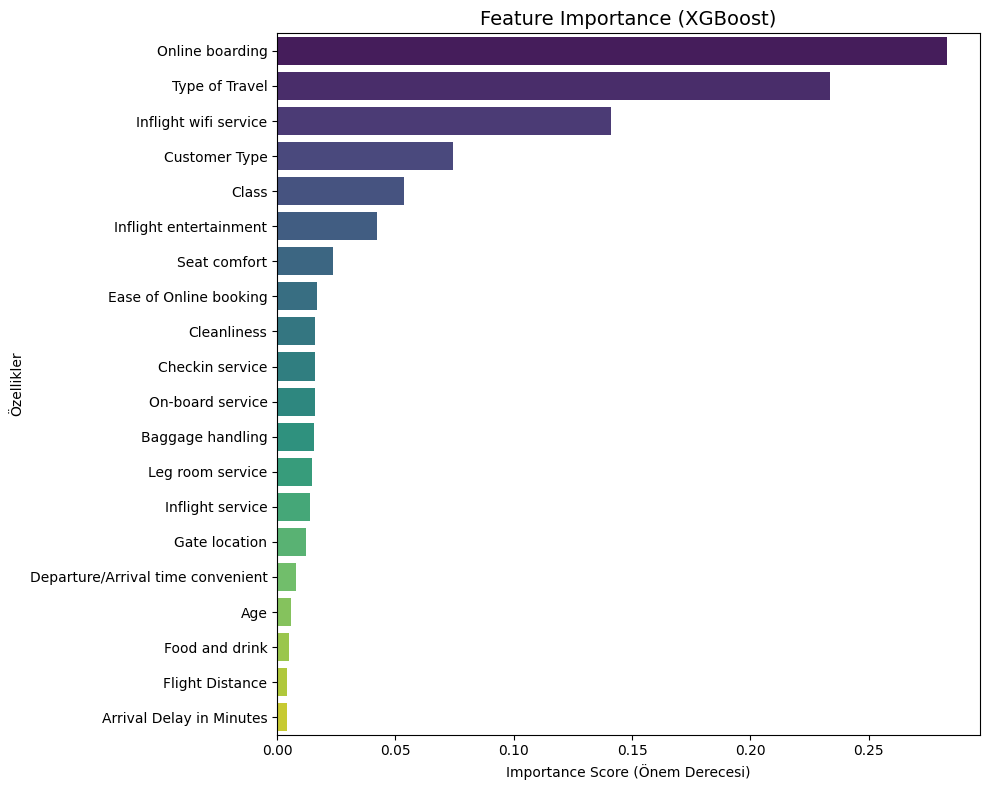

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# CONFUSION MATRIX 
# Get predictions on the test set
y_pred = final_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'], 
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix (Tuned XGBoost)', fontsize=14)
plt.ylabel('True Label')      
plt.xlabel('Predicted Label') 
plt.show()

# FEATURE IMPORTANCE 

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Value': final_xgb.feature_importances_ 
}).sort_values(by='Value', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Value', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (XGBoost)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

print("💡 Optimizing LIGHTGBM (Optuna)...")


# DATA SPLIT FOR OPTUNA (Validation Split)

X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, 
    train_size=0.8,  # 80% Training
    test_size=0.2,   # 20% Validation
    random_state=42, 
    stratify=y_train
)


# OBJECTIVE FUNCTION

def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 42,
        'verbosity': -1, 
        'n_jobs': -1
    }
    
    model = LGBMClassifier(**params)
    model.fit(X_opt_train, y_opt_train)
    preds = model.predict(X_opt_val)
    return accuracy_score(y_opt_val, preds)


# START TUNING

optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=30)

best_params_lgbm = study_lgbm.best_params
print(f"⚙️  LightGBM Best Parameters: {best_params_lgbm}")


# FINAL MODEL & DUAL REPORTING

# Train the model with the best parameters using ALL training data (X_train)
final_lgbm = LGBMClassifier(**best_params_lgbm, random_state=42, verbosity=-1, n_jobs=-1)
final_lgbm.fit(X_train, y_train)

# DUAL Classification Report Function 
def detailed_classification_report_lgbm(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print("\n" + "="*60)
    print("📊 TUNED LIGHTGBM RESULTS")
    print("="*60)
    
    # TRAIN REPORT (Did the model overfit?)
    print("TRAINING SET REPORT")
    print(classification_report(y_train, train_pred, digits=4))
    
    # TEST REPORT (How does it perform in real life?)
    print("TEST SET REPORT")
    print(classification_report(y_test, test_pred, digits=4))
    
    # Robustness Check
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    print("-" * 60)
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
   

# Run the function
detailed_classification_report_lgbm(final_lgbm, X_train, y_train, X_test, y_test)

💡 LIGHTGBM Optimize Ediliyor (Optuna)...
⚙️  LightGBM En İyi Parametreler: {'n_estimators': 319, 'learning_rate': 0.03412341153193525, 'num_leaves': 52, 'max_depth': 12, 'min_child_samples': 72}

📊 TUNED LIGHTGBM RESULTS
TRAINING SET REPORT
              precision    recall  f1-score   support

           0     0.9611    0.9859    0.9733     58879
           1     0.9809    0.9478    0.9641     45025

    accuracy                         0.9694    103904
   macro avg     0.9710    0.9668    0.9687    103904
weighted avg     0.9697    0.9694    0.9693    103904

TEST SET REPORT
              precision    recall  f1-score   support

           0     0.9564    0.9811    0.9686     14573
           1     0.9751    0.9428    0.9587     11403

    accuracy                         0.9643     25976
   macro avg     0.9657    0.9620    0.9636     25976
weighted avg     0.9646    0.9643    0.9642     25976

------------------------------------------------------------
Train Accuracy: 0.9694 | Tes

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings


warnings.filterwarnings('ignore')

print("⚖️ Optimizing LOGISTIC REGRESSION...")


# DATA SPLIT FOR OPTUNA (Validation Split)

X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, 
    train_size=0.8,  # 80% Training
    test_size=0.2,   # 20% Validation
    random_state=42, 
    stratify=y_train 
)

print(f"📉 Optuna Split: {X_opt_train.shape[0]} samples for training, {X_opt_val.shape[0]} samples for validation.")


# OBJECTIVE FUNCTION

def objective_lr(trial):
    # Logistic Regression Hyperparameters
    C = trial.suggest_float('C', 0.001, 10.0, log=True)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])
    
    # Pipeline: Scale -> Train
    # Scaling is crucial for Logistic Regression convergence
    model = make_pipeline(
        StandardScaler(), 
        LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    )
    
    model.fit(X_opt_train, y_opt_train)
    preds = model.predict(X_opt_val)
    return accuracy_score(y_opt_val, preds)


# START TUNING

optuna.logging.set_verbosity(optuna.logging.WARNING) 
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=30) # 30 trials should be sufficient

best_params_lr = study_lr.best_params
print(f"⚙️  Best Parameters: {best_params_lr}")


# FINAL MODEL & DUAL REPORTING

# Train the final model on ALL X_train (including the validation part)
final_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        C=best_params_lr['C'], 
        solver=best_params_lr['solver'], 
        max_iter=1000, 
        random_state=42
    )
)

final_lr.fit(X_train, y_train)

# REPORTING FUNCTION 
def detailed_classification_report_lr(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print("\n" + "="*60)
    print("📊 TUNED LOGISTIC REGRESSION RESULTS")
    print("="*60)
    
    # TRAIN REPORT 
    print("TRAINING SET REPORT")
    print(classification_report(y_train, train_pred, digits=4))
    
    # TEST REPORT 
    print("TEST SET REPORT")
    print(classification_report(y_test, test_pred, digits=4))
    
    # Robustness Check 
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    print("-" * 60)
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    

# Run the function
detailed_classification_report_lr(final_lr, X_train, y_train, X_test, y_test)

⚖️ LOGISTIC REGRESSION Optimize Ediliyor...
📉 Optuna Split: 83123 örnek eğitim için, 20781 örnek doğrulama için ayrıldı.
⚙️  En İyi Parametreler: {'C': 0.23525165683163718, 'solver': 'lbfgs'}

TUNED LOGISTIC REGRESSION RESULTS
TRAINING SET REPORT
              precision    recall  f1-score   support

           0     0.8783    0.9047    0.8913     58879
           1     0.8703    0.8361    0.8528     45025

    accuracy                         0.8750    103904
   macro avg     0.8743    0.8704    0.8721    103904
weighted avg     0.8748    0.8750    0.8746    103904

TEST SET REPORT
              precision    recall  f1-score   support

           0     0.8734    0.9015    0.8872     14573
           1     0.8687    0.8330    0.8505     11403

    accuracy                         0.8714     25976
   macro avg     0.8710    0.8672    0.8688     25976
weighted avg     0.8713    0.8714    0.8711     25976



In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')

print("🐱 Optimizing CATBOOST (Optuna)...")


# DATA SPLIT FOR OPTUNA (Validation Split 80% - 20%)

X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, 
    train_size=0.8,  # 80% for Training
    test_size=0.2,   # 20% for Optuna to test itself
    random_state=42, 
    stratify=y_train
)


# OBJECTIVE FUNCTION

def objective_cat(trial):
    # CatBoost Hyperparameter Search Space
    param = {
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'verbose': 0, 
        'allow_writing_files': False
    }

    model = CatBoostClassifier(**param)
    
    # Using eval_set within Optuna to prevent overfitting during trials
    model.fit(
        X_opt_train, y_opt_train, 
        eval_set=[(X_opt_val, y_opt_val)], 
        early_stopping_rounds=50, 
        verbose=0
    )

    preds = model.predict(X_opt_val)
    return accuracy_score(y_opt_val, preds)


# START TUNING

optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=20) # 20 trials

best_params_cat = study_cat.best_params
print(f"⚙️  CatBoost Best Parameters: {best_params_cat}")


# FINAL MODEL & DUAL REPORTING

print("🚀 Training Final Model...")

# Define final model with best parameters
final_catboost = CatBoostClassifier(
    **best_params_cat, 
    verbose=0, 
    allow_writing_files=False, 
    random_seed=42
)

# Train model with ALL X_train
final_catboost.fit(X_train, y_train)

# DUAL Classification Report Function 
def detailed_classification_report_cat(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print("\n" + "="*60)
    print("📊 TUNED CATBOOST RESULTS")
    print("="*60)
    
    # TRAIN REPORT
    print(" TRAINING SET REPORT ")
    print(classification_report(y_train, train_pred, digits=4))
    
    # TEST REPORT 
    print("TEST SET REPORT")
    print(classification_report(y_test, test_pred, digits=4))
    
    # Robustness Check
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    print("-" * 60)
    print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
  
# Run the function
detailed_classification_report_cat(final_catboost, X_train, y_train, X_test, y_test)

🐱 CATBOOST Optimize Ediliyor (Optuna)...
⚙️  CatBoost En İyi Parametreler: {'iterations': 535, 'depth': 5, 'learning_rate': 0.11022370641309924, 'l2_leaf_reg': 4.64510974045341}
🚀 Final Model Eğitiliyor...

📊 TUNED CATBOOST RESULTS
 TRAINING SET REPORT 
              precision    recall  f1-score   support

           0     0.9619    0.9840    0.9728     58879
           1     0.9784    0.9491    0.9635     45025

    accuracy                         0.9688    103904
   macro avg     0.9702    0.9665    0.9682    103904
weighted avg     0.9691    0.9688    0.9688    103904

TEST SET REPORT
              precision    recall  f1-score   support

           0     0.9571    0.9793    0.9681     14573
           1     0.9728    0.9440    0.9582     11403

    accuracy                         0.9638     25976
   macro avg     0.9650    0.9617    0.9631     25976
weighted avg     0.9640    0.9638    0.9637     25976

------------------------------------------------------------
Train Accuracy:

📥 Veriler yükleniyor ve Gruplanıyor...
🔍 Optuna ile 'Gruplandırılmış XGBoost' aranıyor...
🏆 En İyi XGBoost Parametreleri: {'n_estimators': 179, 'max_depth': 6, 'learning_rate': 0.10218778449559786, 'subsample': 0.9941769384736521, 'colsample_bytree': 0.6954267598570896, 'min_child_weight': 9}

🚀 TUNED GROUPED XGBOOST final modeli eğitiliyor (Tüm Train verisiyle)...

📊 Final Report: TUNED GROUPED XGBOOST
⏱️  Training Time       : 0.8510 s
------------------------------------------------------------
Metric          | TRAIN           | TEST           
------------------------------------------------------------
Log Loss        | 0.1803           | 0.1952
Accuracy        | 0.9254           | 0.9200
Precision       | 0.9299           | 0.9229
Recall          | 0.8953           | 0.8923
F1 Score        | 0.9123           | 0.9073
------------------------------------------------------------
TRAINING SET REPORT
              precision    recall  f1-score   support

           0     0.9221    0

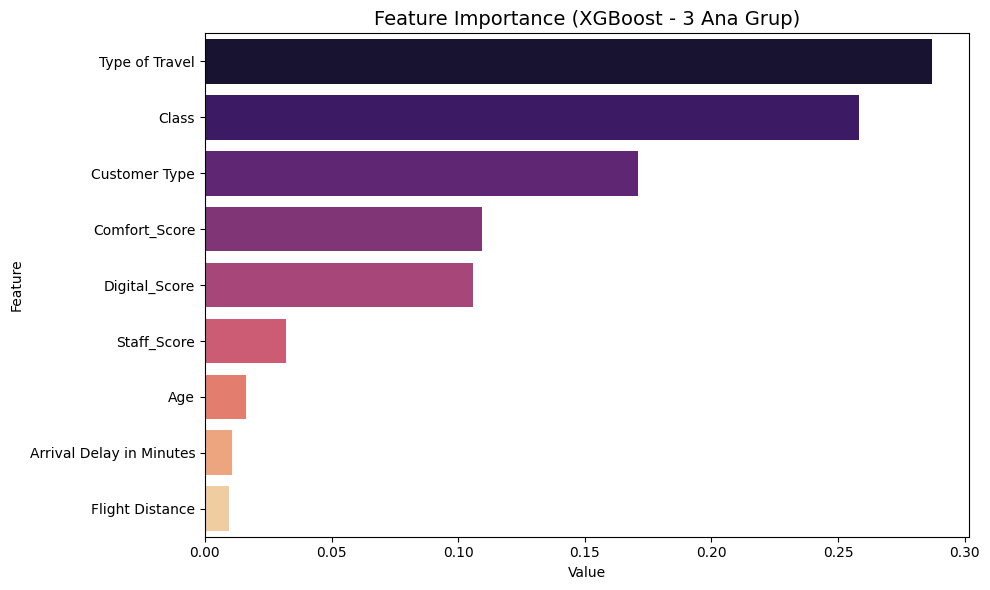

In [ ]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')


# DATA LOADING, CLEANING AND FEATURE ENGINEERING 

print("📥 Loading and Grouping Data...")
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Fill Missing Values (with Median)
for col in ['Arrival Delay in Minutes', 'Departure Delay in Minutes']:
    median_val = train_df[col].median()
    train_df[col].fillna(median_val, inplace=True)
    test_df[col].fillna(median_val, inplace=True)

# FEATURE ENGINEERING: GROUPING
def create_service_groups(df):
    # Digital & Process (Technology)
    df['Digital_Score'] = (df['Inflight wifi service'] + df['Ease of Online booking'] + df['Online boarding']) / 3
    # Comfort & Hardware (Physical)
    df['Comfort_Score'] = (df['Food and drink'] + df['Seat comfort'] + df['Inflight entertainment'] + df['Leg room service'] + df['Cleanliness']) / 5
    # Staff & Operations (Human)
    df['Staff_Score'] = (df['Departure/Arrival time convenient'] + df['Gate location'] + df['On-board service'] + df['Checkin service'] + df['Baggage handling'] + df['Inflight service']) / 6
    return df

train_df = create_service_groups(train_df)
test_df = create_service_groups(test_df)

# DROP OLD COLUMNS 
original_service_cols = [
    'Inflight wifi service', 'Ease of Online booking', 'Online boarding',
    'Food and drink', 'Seat comfort', 'Inflight entertainment', 'Leg room service', 'Cleanliness',
    'Departure/Arrival time convenient', 'Gate location', 'On-board service', 
    'Checkin service', 'Baggage handling', 'Inflight service'
]
# We also drop Gender and Departure Delay
cols_to_drop = original_service_cols + ['Unnamed: 0', 'id', 'Gender', 'Departure Delay in Minutes']

train_df.drop(columns=[c for c in cols_to_drop if c in train_df.columns], inplace=True)
test_df.drop(columns=[c for c in cols_to_drop if c in test_df.columns], inplace=True)

# ENCODING 
target_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
train_df['satisfaction'] = train_df['satisfaction'].map(target_map)
test_df['satisfaction'] = test_df['satisfaction'].map(target_map)

class_map = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
train_df['Class'] = train_df['Class'].map(class_map)
test_df['Class'] = test_df['Class'].map(class_map)

le_cols = ['Customer Type', 'Type of Travel']
for c in le_cols:
    le = LabelEncoder()
    train_df[c] = le.fit_transform(train_df[c])
    test_df[c] = le.transform(test_df[c])

# Prepared Datasets
X_train = train_df.drop('satisfaction', axis=1)
y_train = train_df['satisfaction']
X_test = test_df.drop('satisfaction', axis=1)
y_test = test_df['satisfaction']


# DATA SPLIT FOR OPTUNA (80% Train - 20% Validation)
X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("🔍 Searching for 'Grouped XGBoost' via Optuna...")
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective_xgb(trial):
    # XGBoost Hyperparameters
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'n_jobs': -1
    }
    
    model = XGBClassifier(**param)
    # Train with Optuna train set, test with val set
    model.fit(X_opt_train, y_opt_train)
    
    preds = model.predict(X_opt_val)
    return accuracy_score(y_opt_val, preds)

# Start Study
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=15) # 15 trials for speed

print(f"🏆 Best XGBoost Parameters: {study_xgb.best_params}")


# DETAILED REPORT FUNCTION (DUAL REPORT)
def generate_detailed_report_xgb(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\n🚀 Training {model_name} final model (with ALL Train data)...")
    
    start_time = time.time()
    
    # We train with ALL X_train, not just the split data
    model.fit(X_train, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)
    
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)
    
    # Metrics
    train_loss = log_loss(y_train, y_proba_train)
    test_loss = log_loss(y_test, y_proba_test)
    
    metrics = {
        "Accuracy": (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)),
        "Precision": (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)),
        "Recall": (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)),
        "F1 Score": (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test))
    }
    
    # TABLE OUTPUT
    print("\n" + "="*60)
    print(f"📊 Final Report: {model_name}")
    print("="*60)
    print(f"⏱️  Training Time       : {training_time:.4f} s") 
    print("-" * 60)
    print(f"{'Metric':<15} | {'TRAIN':<15} | {'TEST':<15}")
    print("-" * 60)
    print(f"{'Log Loss':<15} | {train_loss:.4f}           | {test_loss:.4f}")
    
    for metric_name, (train_score, test_score) in metrics.items():
        print(f"{metric_name:<15} | {train_score:.4f}           | {test_score:.4f}")
    print("-" * 60)
    
    # DUAL CLASSIFICATION REPORT
    print("TRAINING SET REPORT")
    print(classification_report(y_train, y_pred_train, digits=4))
    
    print("TEST SET REPORT")
    print(classification_report(y_test, y_pred_test, digits=4))
    print("="*60 + "\n")


# CREATE AND RUN FINAL MODEL
final_xgb_grouped = XGBClassifier(
    **study_xgb.best_params, 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss',
    n_jobs=-1
)

# Call the function
generate_detailed_report_xgb(final_xgb_grouped, "TUNED GROUPED XGBOOST", X_train, y_train, X_test, y_test)


🔍 SHAP Değerleri Hesaplanıyor...


PermutationExplainer explainer: 2001it [07:12,  4.59it/s]                          


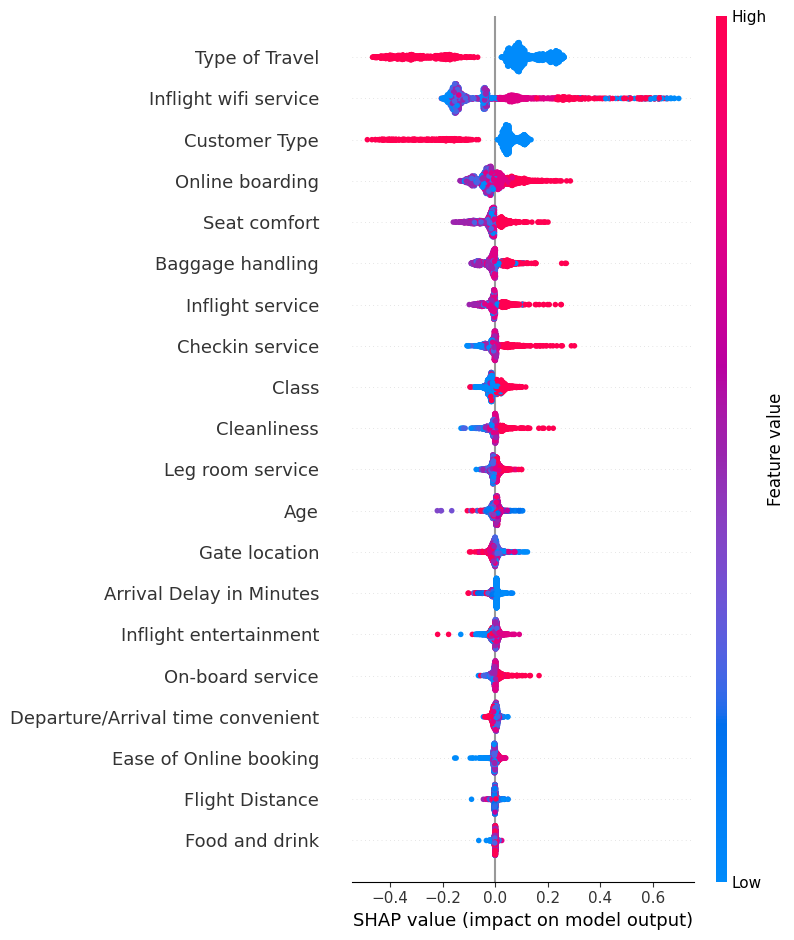

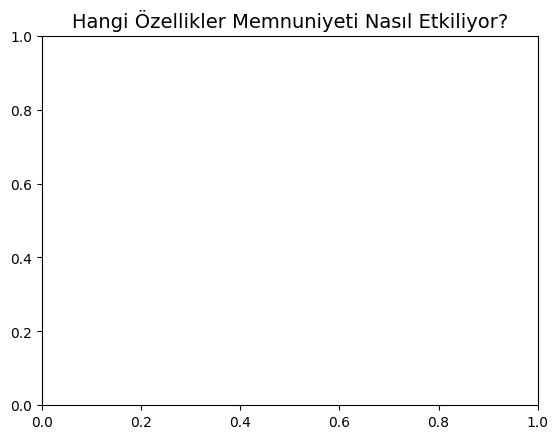

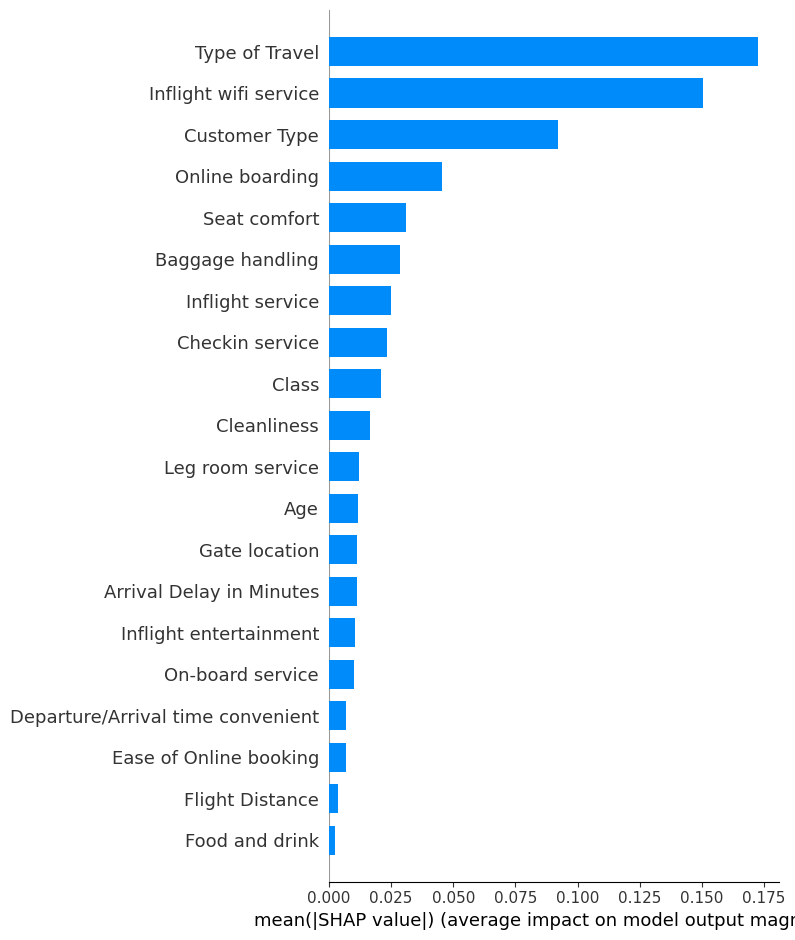

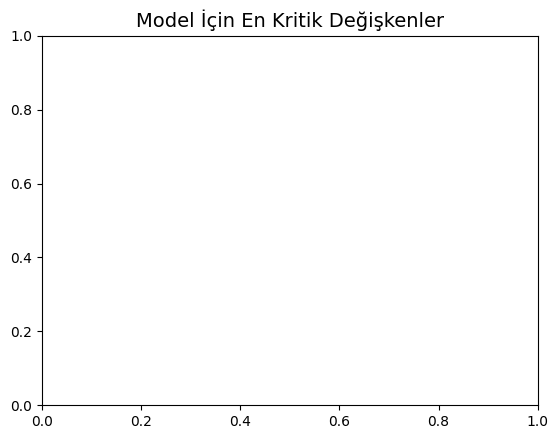

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

shap.initjs()

print("🔍 Calculating SHAP Values...")

X_shap = X_test.iloc[:2000]

def model_predict(X):
    return final_xgb.predict_proba(X)[:, 1] 

explainer = shap.Explainer(model_predict, X_shap)

shap_values = explainer(X_shap)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_shap)

In [ ]:
import time

print("MEASURING XGB INFERENCE TIME...")

start_time = time.time()

# Prediction time on the Test Set
# (Using the model directly since it's already in memory)
_ = final_xgb.predict(X_test)

# End time
end_time = time.time()

# Calculation (Seconds -> Milliseconds)
total_ms = (end_time - start_time) * 1000
per_sample_ms = total_ms / len(X_test)

print(f"Test Set Size: {len(X_test)} rows")
print(f"Total Time: {total_ms:.2f} ms")
print(f"Latency per Passenger: {per_sample_ms:.4f} ms")

⏱️  INFERENCE TIME (TAHMİN HIZI) ÖLÇÜLÜYOR...
Test Seti Boyutu: 25976 satır
Toplam Süre: 109.96 ms
Yolcu Başına Gecikme (Latency): 0.0042 ms
✅ SONUÇ: Model canlı sistemler için yeterince hızlı.


In [ ]:
import time

print("MEASURING RANDOM FOREST INFERENCE TIME...")

start_time = time.time()

_ = final_rf.predict(X_test)

end_time = time.time()

total_ms = (end_time - start_time) * 1000
per_sample_ms = total_ms / len(X_test)

print(f"Test Set Size: {len(X_test)} rows")
print(f"Total Time: {total_ms:.2f} ms")
print(f"Latency per Passenger: {per_sample_ms:.4f} ms")


⏱️  RANDOM FOREST INFERENCE TIME ÖLÇÜLÜYOR...
Test Seti Boyutu: 25976 satır
Toplam Süre: 149.57 ms
Yolcu Başına Gecikme (Latency): 0.0058 ms
✅ SONUÇ: Random Forest da canlı sistemler için yeterince hızlı.


In [ ]:
import time

print("MEASURING LIGHTGBM INFERENCE TIME...")

start_time = time.time()

_ = final_lgbm.predict(X_test)

end_time = time.time()

total_ms = (end_time - start_time) * 1000
per_sample_ms = total_ms / len(X_test)

print(f"Test Set Size: {len(X_test)} rows")
print(f"Total Time: {total_ms:.2f} ms")
print(f"Latency per Passenger: {per_sample_ms:.4f} ms")


⏱️  LIGHTGBM INFERENCE TIME ÖLÇÜLÜYOR...
Test Seti Boyutu: 25976 satır
Toplam Süre: 123.00 ms
Yolcu Başına Gecikme (Latency): 0.0047 ms
✅ SONUÇ: LightGBM son derece hızlı ve canlı sistemlere uygun.


In [ ]:
import time

print("MEASURING CATBOOST INFERENCE TIME...")

start_time = time.time()

_ = final_catboost.predict(X_test)

end_time = time.time()

total_ms = (end_time - start_time) * 1000
per_sample_ms = total_ms / len(X_test)

print(f"Test Set Size: {len(X_test)} rows")
print(f"Total Time: {total_ms:.2f} ms")
print(f"Latency per Passenger: {per_sample_ms:.4f} ms")


⏱️  CATBOOST INFERENCE TIME ÖLÇÜLÜYOR...
Test Seti Boyutu: 25976 satır
Toplam Süre: 17.00 ms
Yolcu Başına Gecikme (Latency): 0.0007 ms
✅ SONUÇ: CatBoost, simetrik ağaç yapısı sayesinde tahminde çok hızlıdır.


In [ ]:
import time

print("MEASURING LOGISTIC REGRESSION INFERENCE TIME....")

start_time = time.time()

_ = final_lr.predict(X_test)

end_time = time.time()

total_ms = (end_time - start_time) * 1000
per_sample_ms = total_ms / len(X_test)

print(f"Test Set Size: {len(X_test)} rows")
print(f"Total Time: {total_ms:.2f} ms")
print(f"Latency per Passenger: {per_sample_ms:.4f} ms")


⏱️  LOGISTIC REGRESSION INFERENCE TIME ÖLÇÜLÜYOR...
Test Seti Boyutu: 25976 satır
Toplam Süre: 13.03 ms
Yolcu Başına Gecikme (Latency): 0.0005 ms
✅ SONUÇ: Lojistik Regresyon matematiksel olarak çok basittir, bu yüzden çok hızlıdır.
